<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

Необходимо спрогнозировать, уйдет клиент из банка или нет, используя исторические данные о поведении клиентов.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Признаки
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

Целевой признак
* Exited — факт ухода клиента

## Подготовка данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Есть пропуски в "сколько лет человек является клиентом банка" - заменим их на медиану, так как этот показатель не возможно привязать ни к какому другому показателю.

In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
# заполним пропуски медианным значением
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Видно, что пропусков больше нет, среднее и медиана тоже не изменились.

Необходимо обработать категориальные признаки техникой OHE и масштабировать признаки, сразу уберем ненужные столбцы - индекс строки в данных, уникальный идентификатор клиента и фамилию.

In [5]:
data_ohe = pd.get_dummies(data.drop(columns=['RowNumber', 'CustomerId', 'Surname']), drop_first=True)
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.30, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.35, random_state=12345)

numeric = ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(6500, 11)
(6500,)
(3500, 11)
(3500,)
(3000, 11)
(3000,)


/tmp/ipykernel_36/2779606821.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_36/2779606821.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

## Исследование задачи

In [6]:
best_result = 0
for depth in range(1, 12):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    if result > best_result:
        best_depth = depth
        best_result = result
        best_auc_roc = auc_roc

 
print("Значение F1-меры дерева решений:", best_result)
print("Значение AUC-ROC дерева решений:", best_auc_roc)
print("Глубина дерева решений:", best_depth)

Значение F1-меры дерева решений: 0.5318471337579617
Значение AUC-ROC дерева решений: 0.7644751074255114
Глубина дерева решений: 10


In [10]:
best_result = 0
for est in range(60, 81):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train) 
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    if result > best_result:
        best_est = est
        best_result = result
        best_auc_roc = auc_roc
 
print("Значение F1-меры случайного леса:", best_result)
print("Значение AUC-ROC случайного леса:", best_auc_roc)
print("Значение est случайного леса:", best_est)

Значение F1-меры случайного леса: 0.5618556701030928
Значение AUC-ROC случайного леса: 0.8486366663317315
Значение est случайного леса: 77


In [11]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
result = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print("Значение F1-меры логистической регрессии:", result)
print("ROC AUC логистической регрессии:", auc_roc)

Значение F1-меры логистической регрессии: 0.2945891783567134
ROC AUC логистической регрессии: 0.750097032671935


<b>Вывод:</b> в результате исследования лучшие результаты у случайного леса. Логистическая регрессия совсем низкой точности.

## Борьба с дисбалансом

In [7]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]
print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(5197, 11)
(1303, 11)
(5197,)
(1303,)


Видно, что в выборке дисбаланс классов. Попробуем:
* уменьшить выборку в 0,25 раз;
* увеличить выборку в 4 раза.

In [8]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [14]:
best_result = 0
for depth in range(1, 12):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    if result > best_result:
        best_depth = depth
        best_result = result
        best_auc_roc = auc_roc

 
print("Значение F1-меры дерева решений downsampled:", best_result)
print("Значение AUC-ROC дерева решений downsampled:", best_auc_roc)
print("Глубина дерева решений downsampled:", best_depth)

Значение F1-меры дерева решений downsampled: 0.5944997074312462
Значение AUC-ROC дерева решений downsampled: 0.8259374242701862
Глубина дерева решений downsampled: 5


In [15]:
best_result = 0
for est in range(10, 101):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    if result > best_result:
        best_est = est
        best_result = result
        best_auc_roc = auc_roc
 
print("Значение F1-меры случайного леса downsampled:", best_result)
print("Значение AUC-ROC случайного леса downsampled:", best_auc_roc)
print("Значение est случайного леса downsampled:", best_est)

Значение F1-меры случайного леса downsampled: 0.5868131868131868
Значение AUC-ROC случайного леса downsampled: 0.8415850508608818
Значение est случайного леса downsampled: 56


In [16]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
result = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print("Значение F1-меры логистической регрессии downsampled:", result)
print("AUC-ROC логистической регрессии downsampled:", auc_roc)

Значение F1-меры логистической регрессии downsampled: 0.47647058823529415
AUC-ROC логистической регрессии downsampled: 0.7485317035784862


<b>Вывод:</b> при уменьшении выборки, лучшие результаты у модели дерева решений. Значение AUC-ROC у модели дерева решений выросла вместе с F1-мерой, а у модели случайного леса - не изменилась.

In [9]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [18]:
best_result = 0
for depth in range(1, 12):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    if result > best_result:
        best_depth = depth
        best_result = result
        best_auc_roc = auc_roc

 
print("Значение F1-меры дерева решений upsampled:", best_result)
print("Значение AUC-ROC дерева решений upsampled:", best_auc_roc)
print("Глубина дерева решений upsampled:", best_depth)

Значение F1-меры дерева решений upsampled: 0.5875402792696025
Значение AUC-ROC дерева решений upsampled: 0.8294404514925299
Глубина дерева решений upsampled: 6


In [19]:
best_result = 0
for est in range(10, 101):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    if result > best_result:
        best_est = est
        best_result = result
        best_auc_roc = auc_roc
 
print("Значение F1-меры случайного леса upsampled:", best_result)
print("Значение AUC-ROC случайного леса upsampled:", best_auc_roc)
print("Значение est случайного леса upsampled:", best_est)

Значение F1-меры случайного леса upsampled: 0.6057401812688822
Значение AUC-ROC случайного леса upsampled: 0.8415503259706716
Значение est случайного леса upsampled: 64


In [20]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
result = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print("Значение F1-меры логистической регрессии upsampled:", result)
print("ROC AUC логистической регрессии upsampled:", auc_roc)

Значение F1-меры логистической регрессии upsampled: 0.486328125
ROC AUC логистической регрессии upsampled: 0.7546743150084423


<b>Вывод:</b> при увеличении выборки, лучшие результаты у модели случайного леса. 

<b>Вывод:</b> в результате борьбы с дисбалансом определилось, что лучшая модель - случайный лес с параметром est = 64 и лучший способ борьбы с дисбалансом - увеличение выборки в 4 раза

## Тестирование модели

In [18]:
model = RandomForestClassifier(random_state=12345, n_estimators=64, class_weight='balanced')
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
result_downsampled = f1_score(target_valid, predicted_valid)

predicted_test = model.predict(features_test)
result_test = f1_score(target_test, predicted_test)

probabilities = model.predict_proba(features_test)
probabilities_one = probabilities[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one)
 
print("Значение F1-меры на валидационной выборке:", result_downsampled)
print("Значение F1-меры на тестовой выборке:", result_test)
print('AUC-ROC:', auc_roc)

Значение F1-меры на валидационной выборке: 0.6059678653404744
Значение F1-меры на тестовой выборке: 0.6046511627906977
AUC-ROC: 0.8456612637976373


<b>Вывод:</b> мы обучили модели, исследовали их качество, меняя гиперпараметры без учета дисбаланса и определили, что наиболее точная модель случайного леса. Также, исследовали модели с учетом дисбаланса - применили уменьшение и увеличение выборки. Проверили качество модели на тестовой выборке, оно нас устроило, удалось достичь F1-меры 0.60.  Значение AUC-ROC у модели дерева решений выросла вместе с F1-мерой, а у модели случайного леса - не изменялась.

Посмотрим на важность признаков

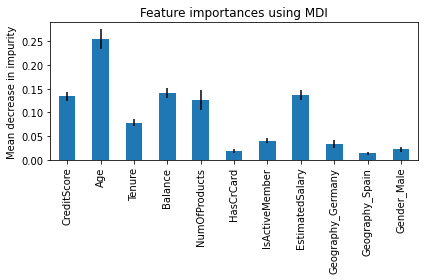

In [17]:
importances = model.feature_importances_
forest_importances = pd.Series(importances, index=features.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

По графику видно, что большее значение на отток клиентов оказывает возраст клиента. Затем примерно одинаковую важность имеют кредитный рейтинг, баланс на счете, зарплата и количество продуктов банка, используемых клиентом. Еще небольшой вес имеет сколько лет человек является клиентом банка, а остальные признаки имеют совсем низную важность.